# _Questions and Answers_

We have already gained some insights about the programming community around the world in general, simply by exploring individual columns as of the dataset. Let's ask some specific questions, and try to answer them by the visalizations and the data frame operations.

Firstly, let's import the data from other notebooks.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        58930 non-null  object 
 1   Age                            65437 non-null  object 
 2   EdLevel                        60784 non-null  object 
 3   LearnCode                      60488 non-null  object 
 4   YearsCode                      59869 non-null  object 
 5   YearsCodePro                   51610 non-null  object 
 6   LanguageHaveWorkedWith         59745 non-null  object 
 7   LanguageWantToWorkWith         55752 non-null  object 
 8   WebframeHaveWorkedWith         45161 non-null  object 
 9   WebframeWantToWorkWith         38535 non-null  object 
 10  AIToolCurrently Using          35072 non-null  object 
 11  AIToolInterested in Using      30691 non-null  object 
 12  AIToolNot interested in Using  24414 non-null 

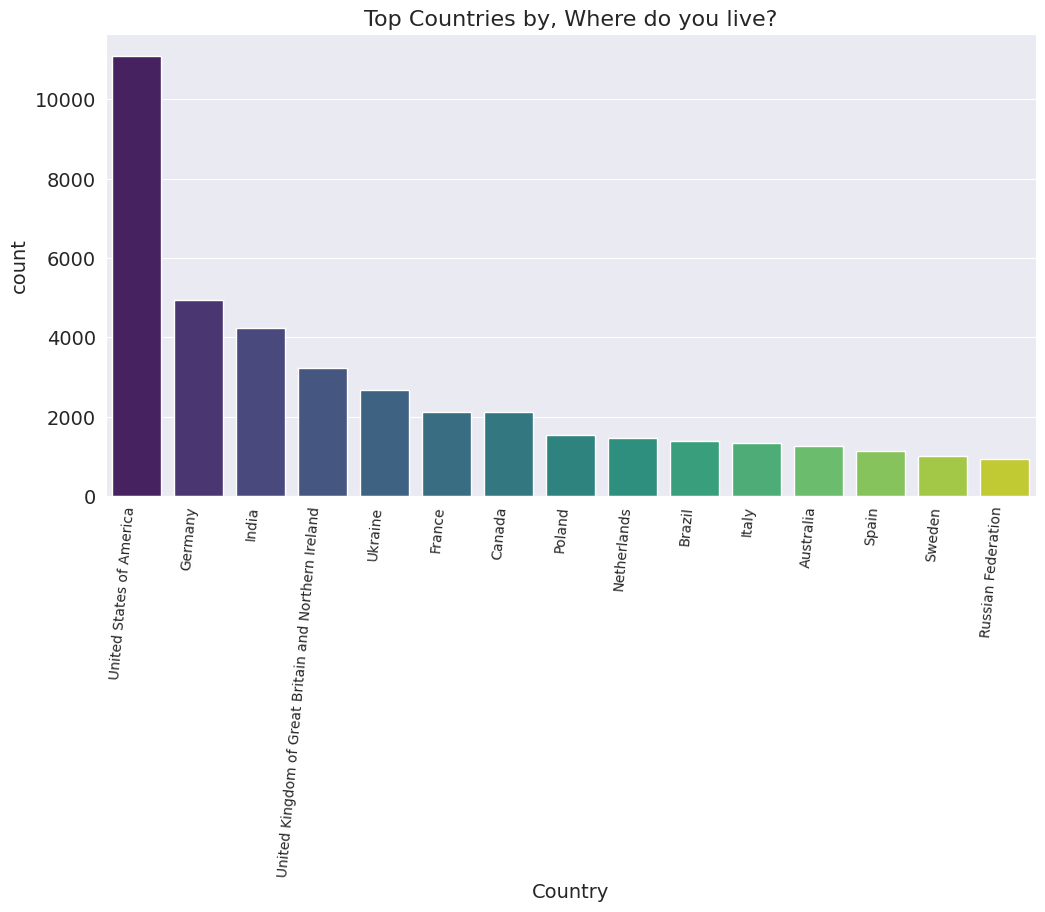

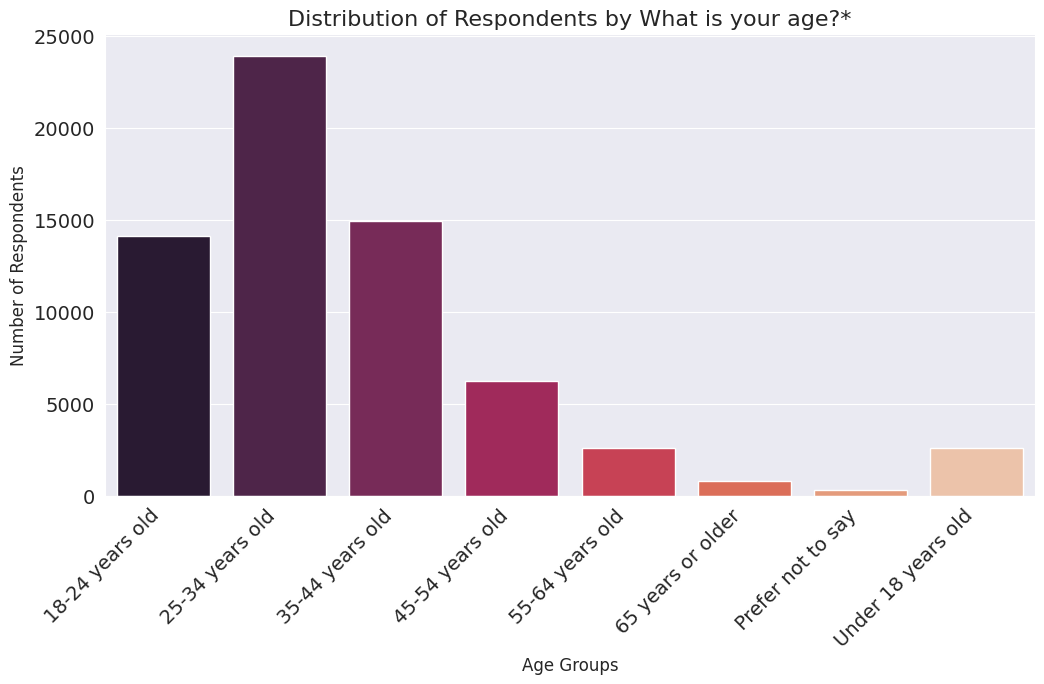

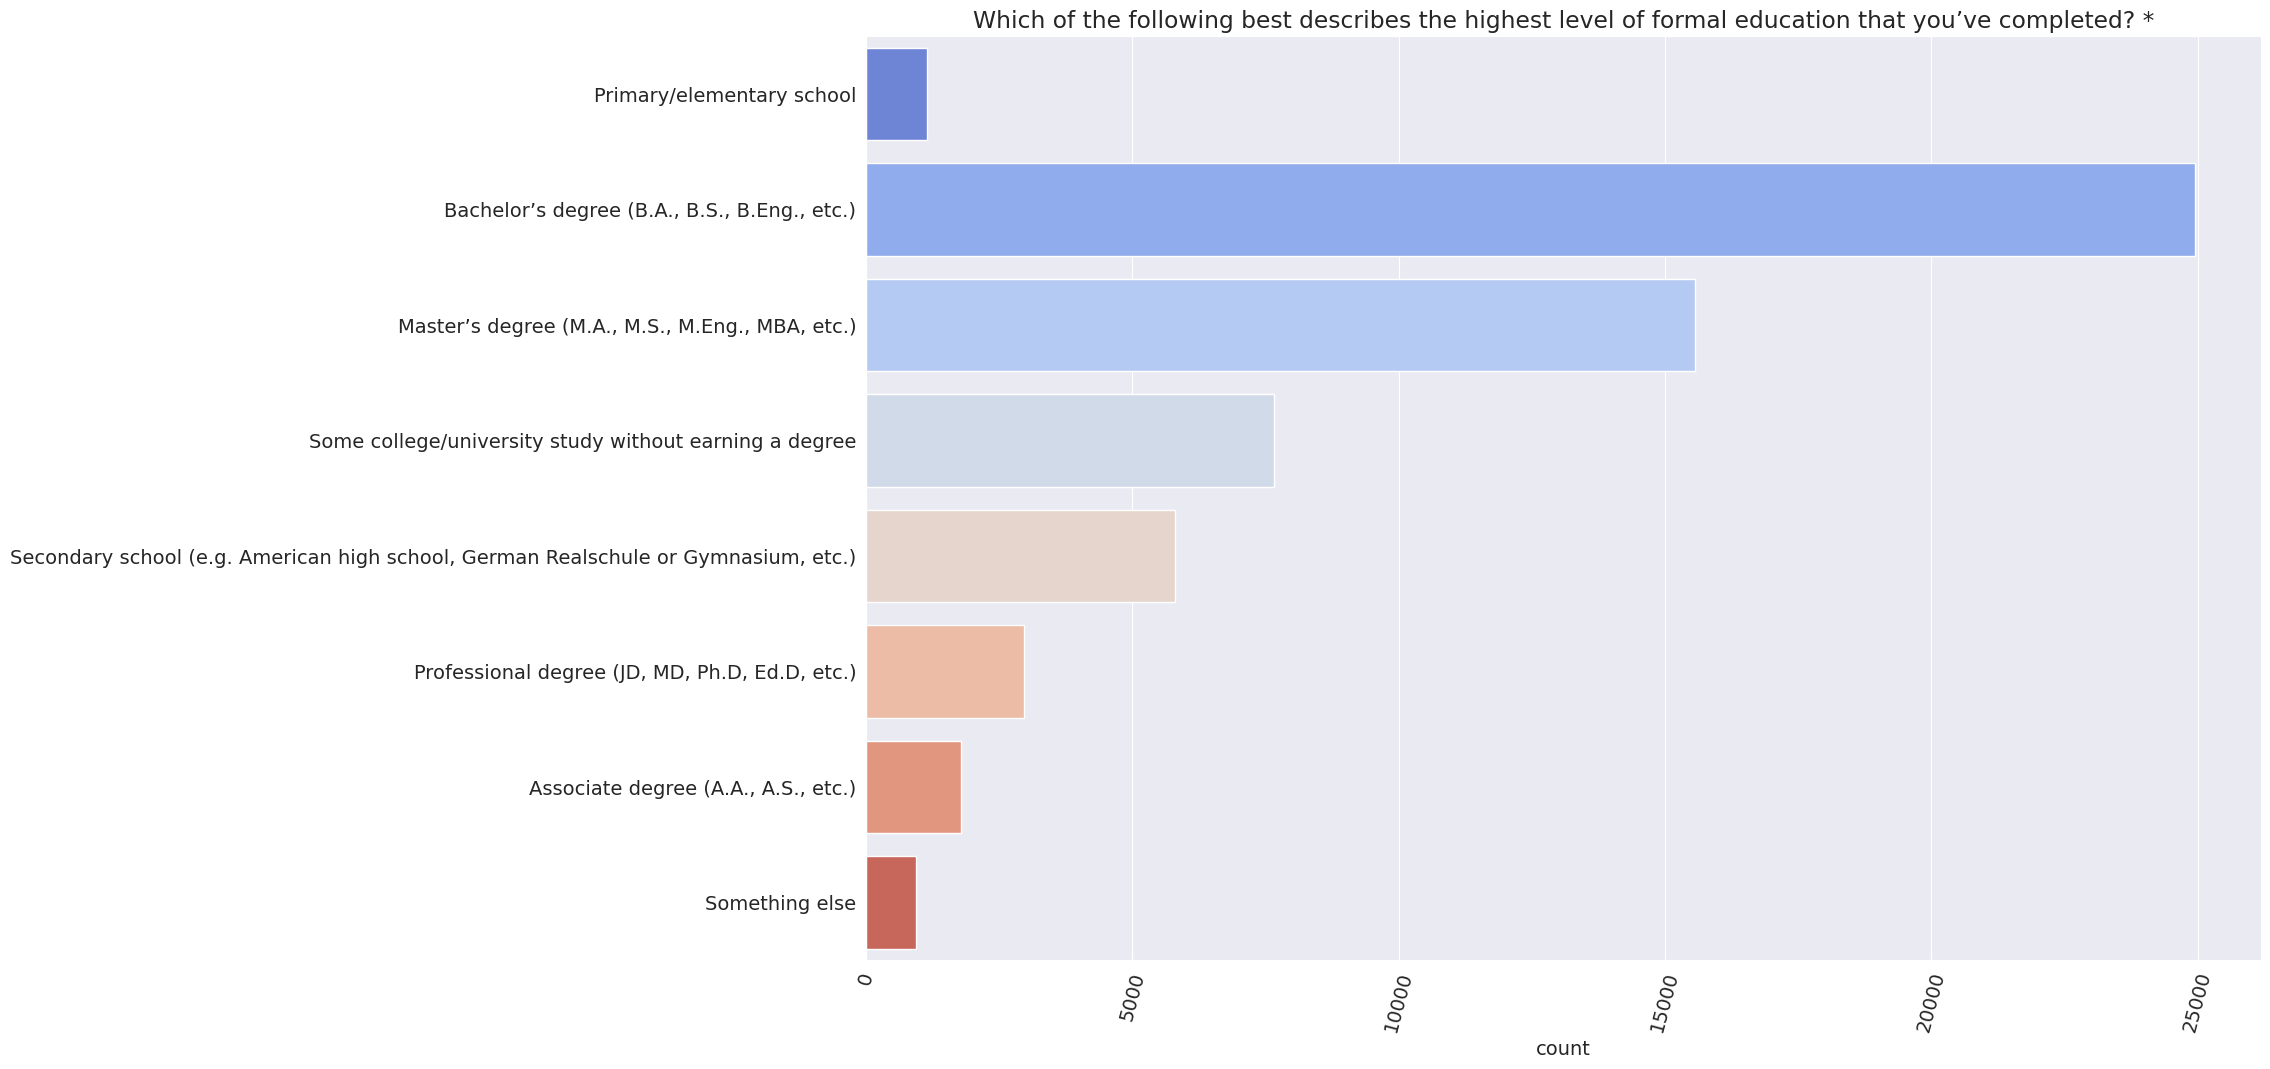

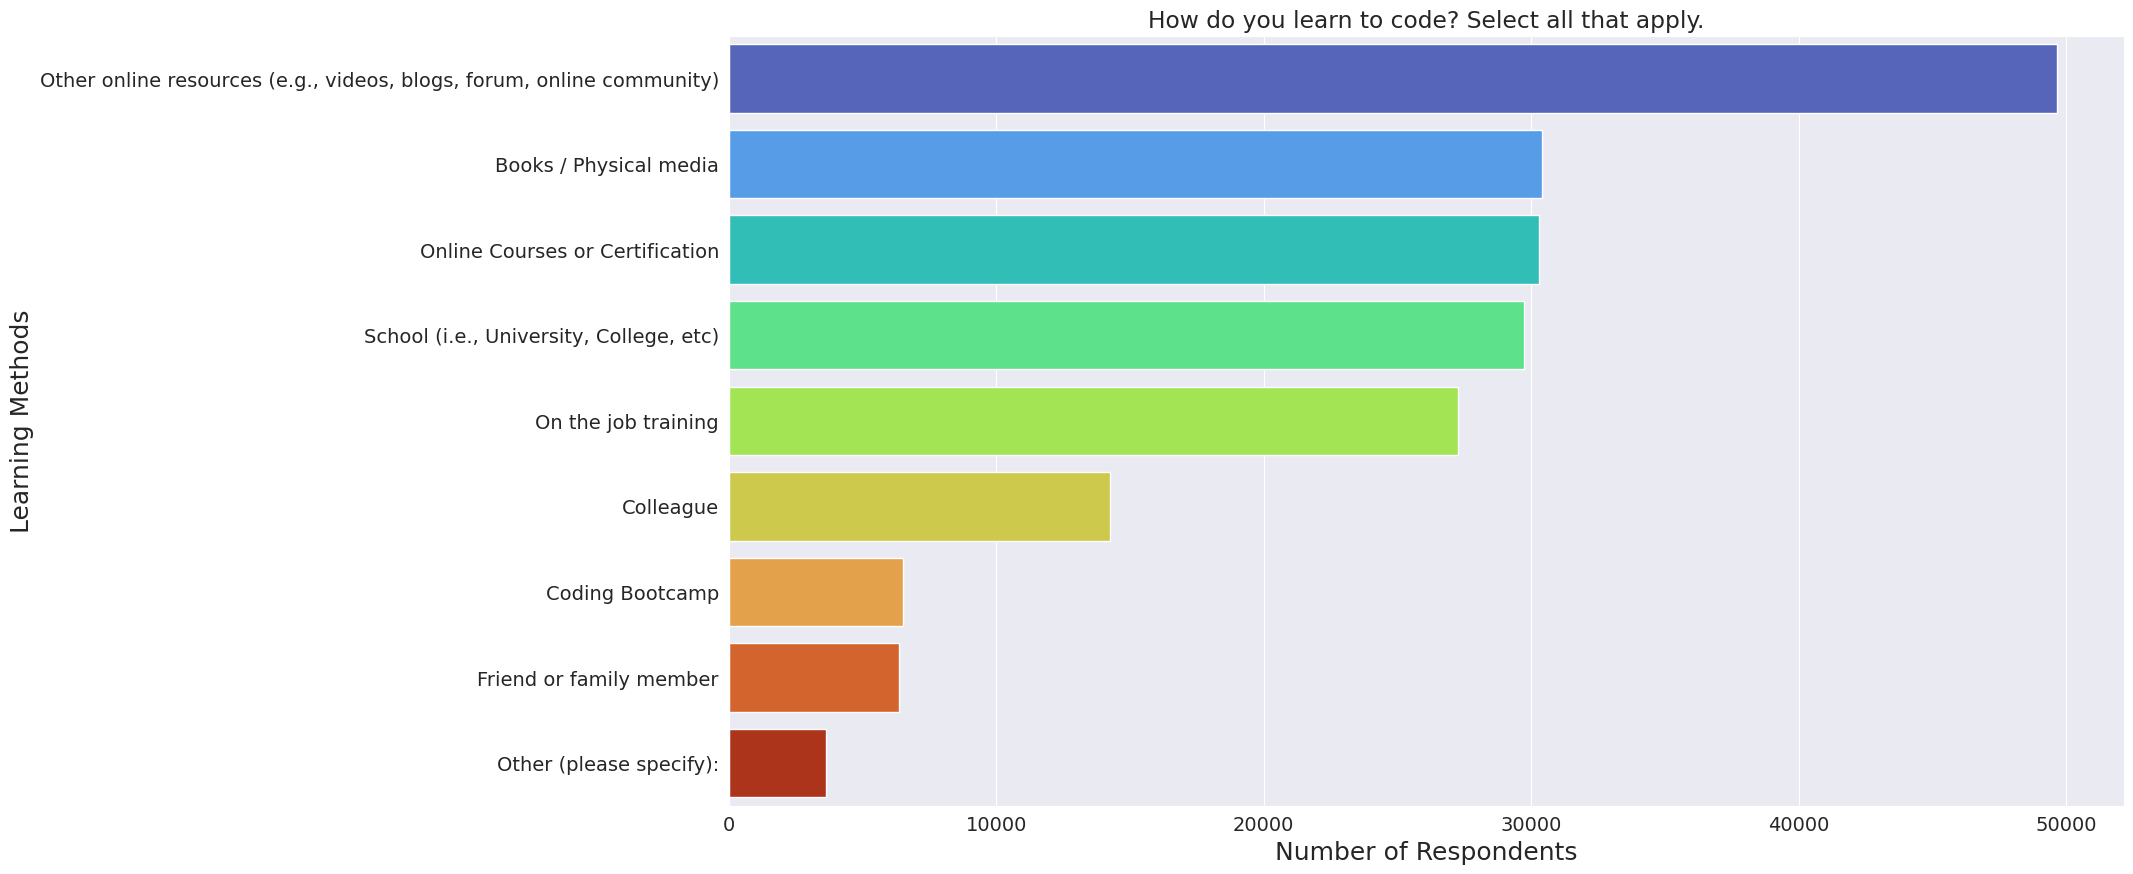

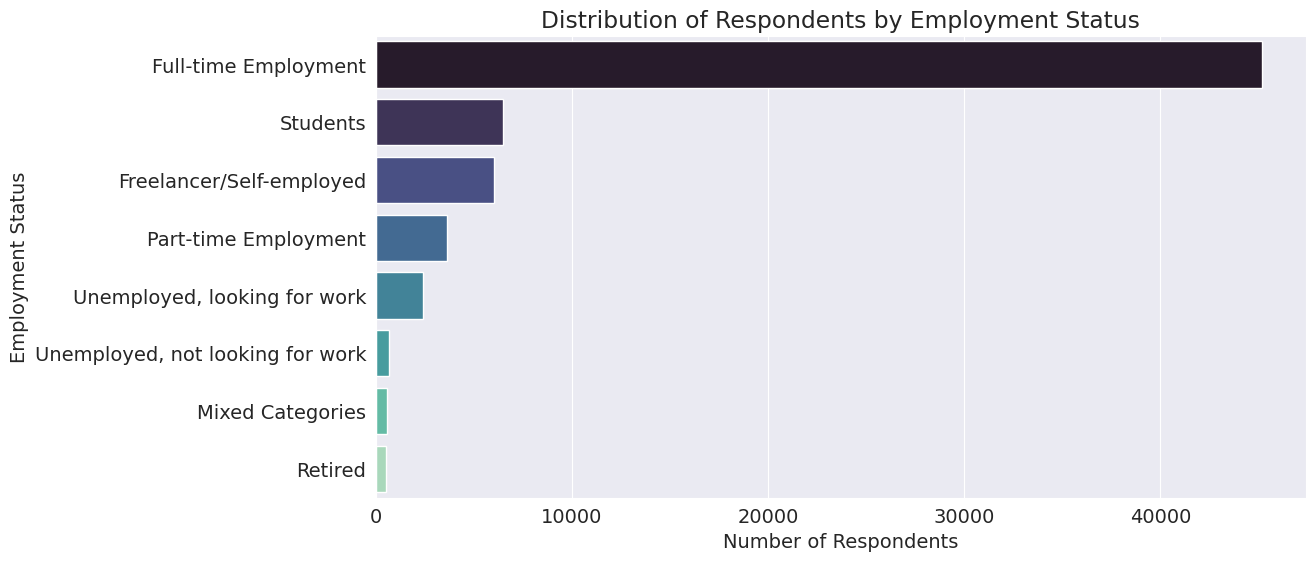

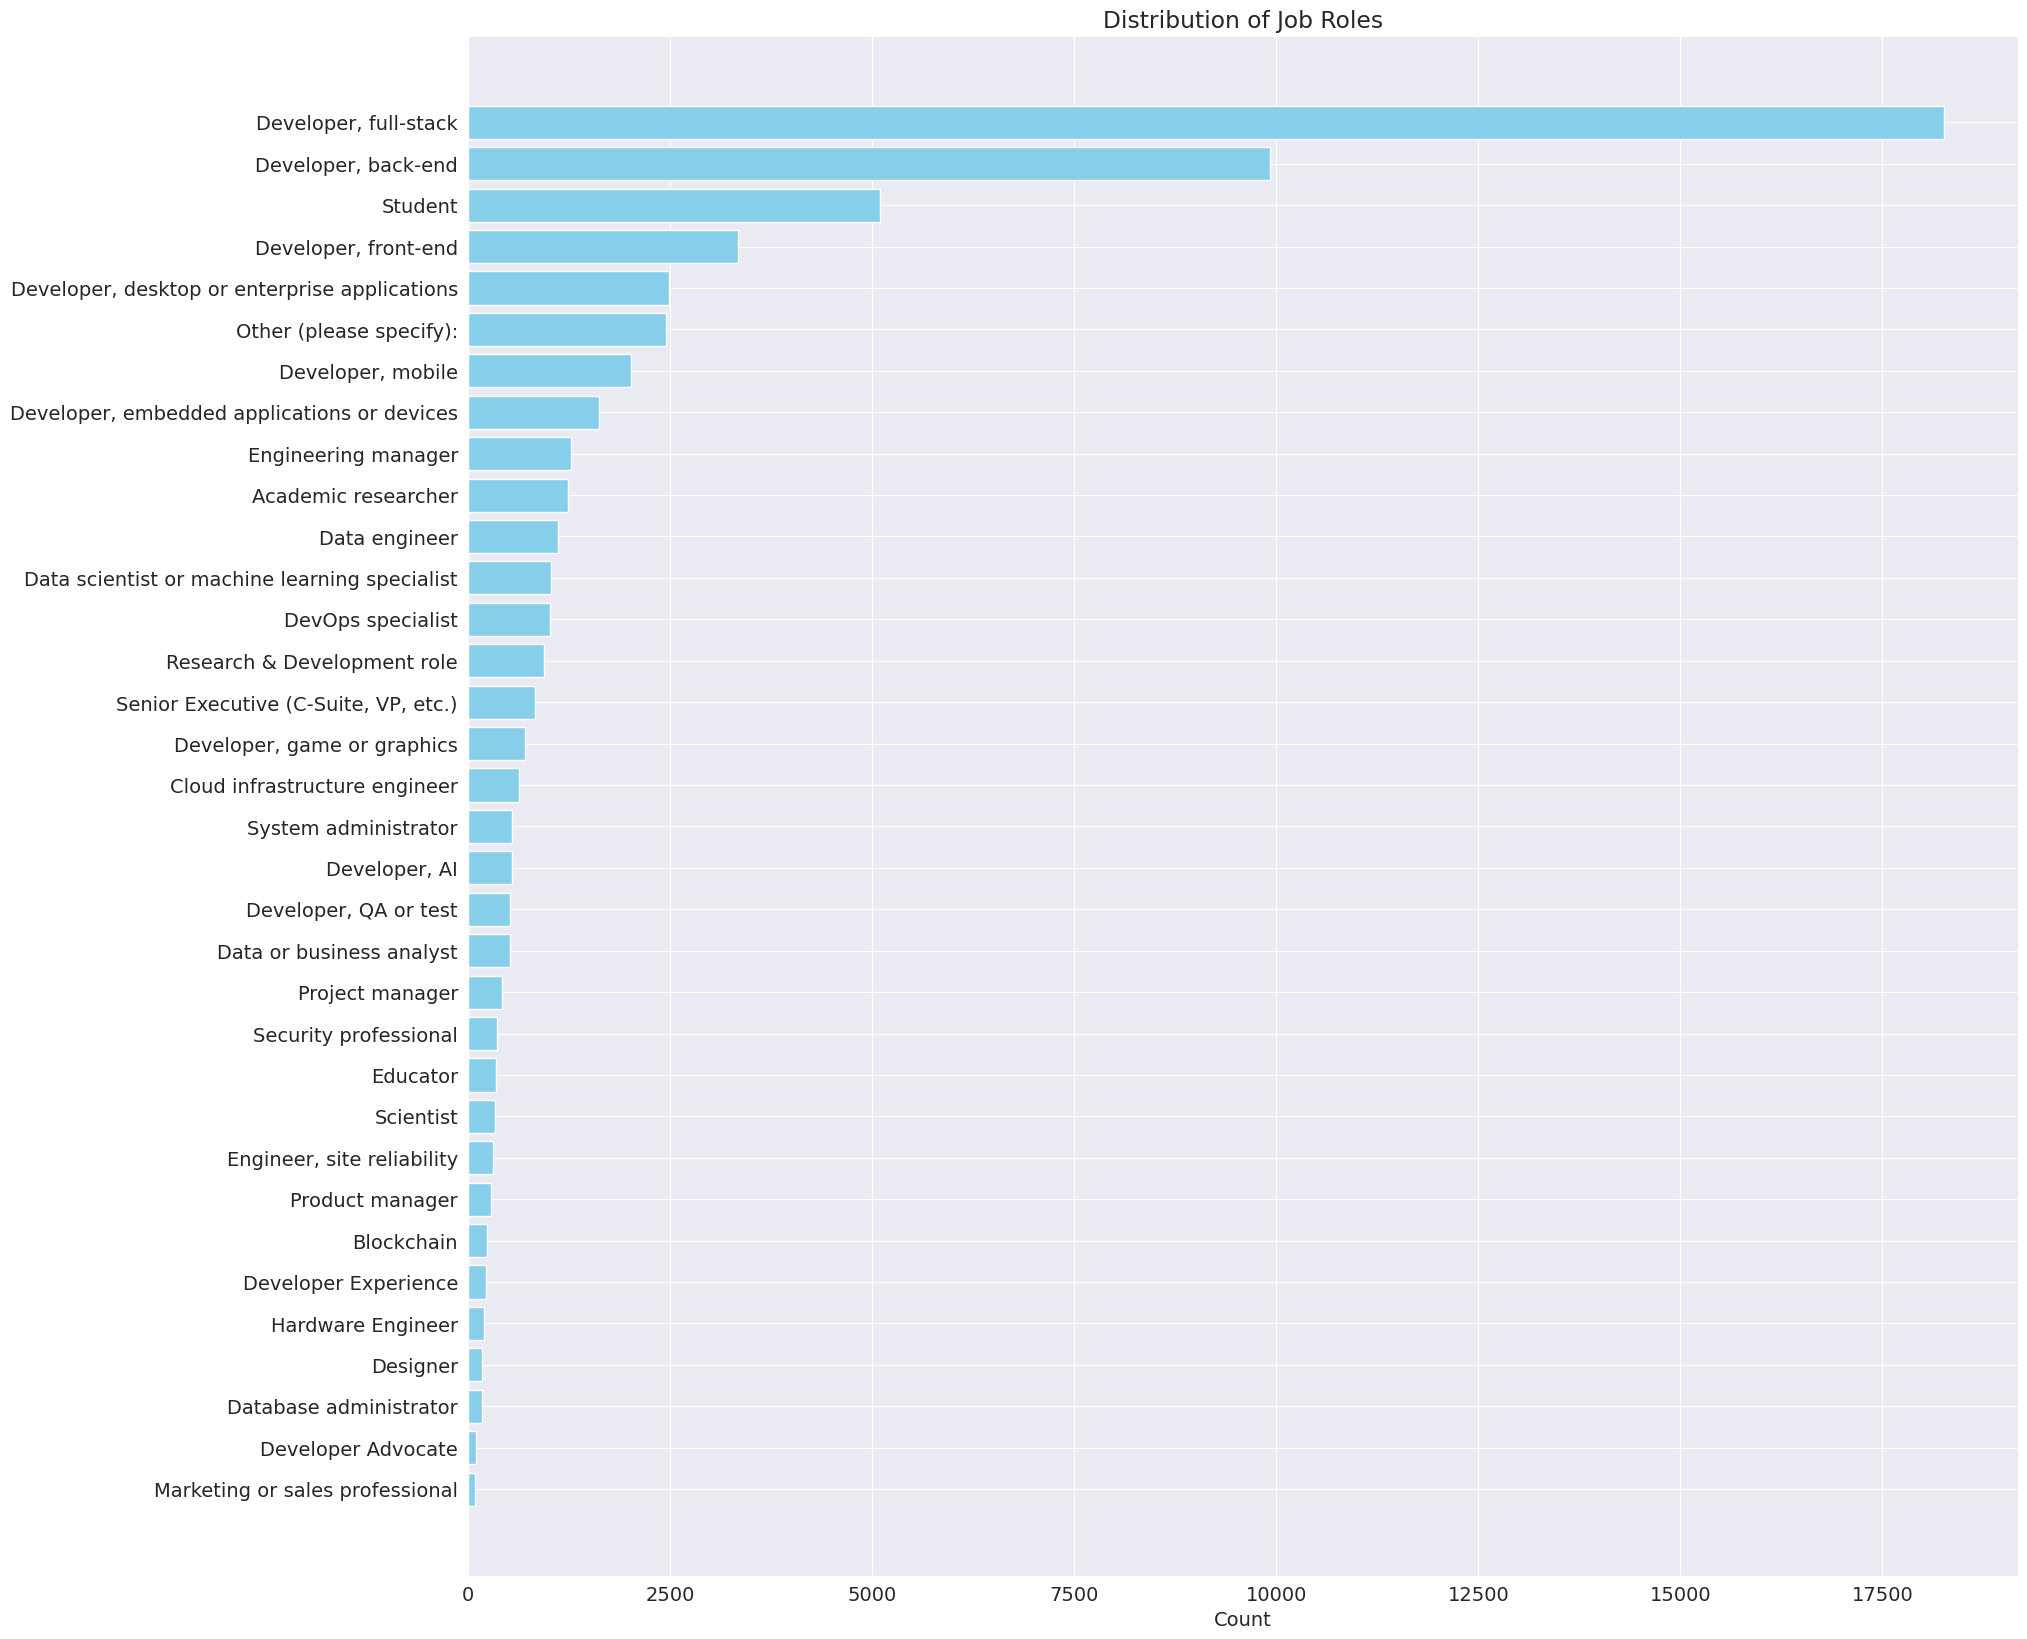

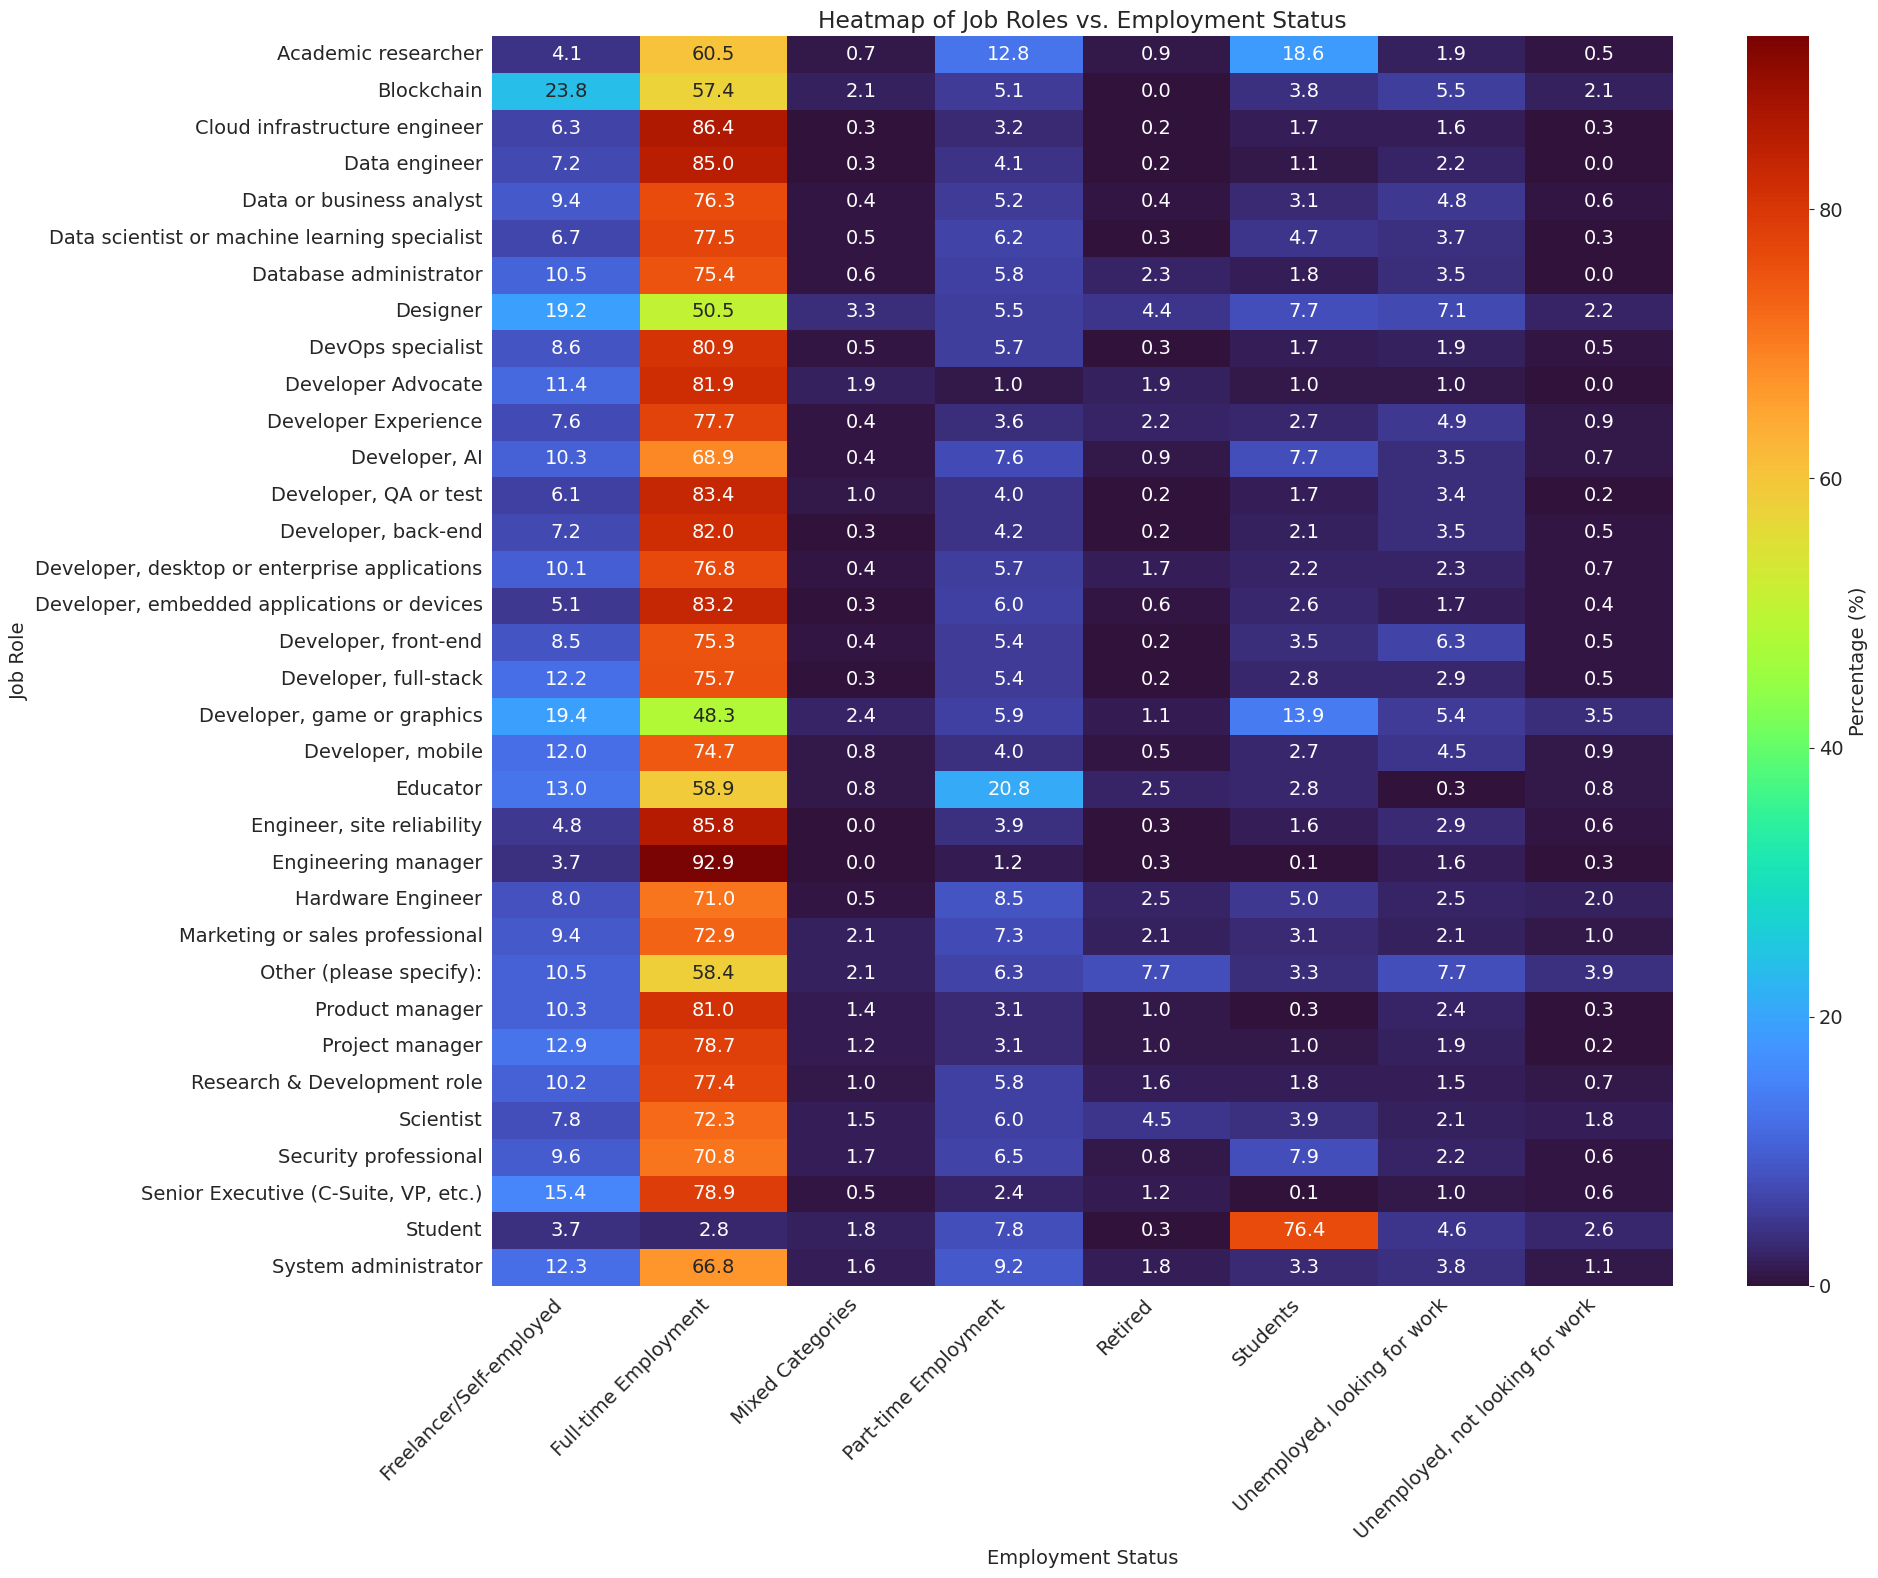

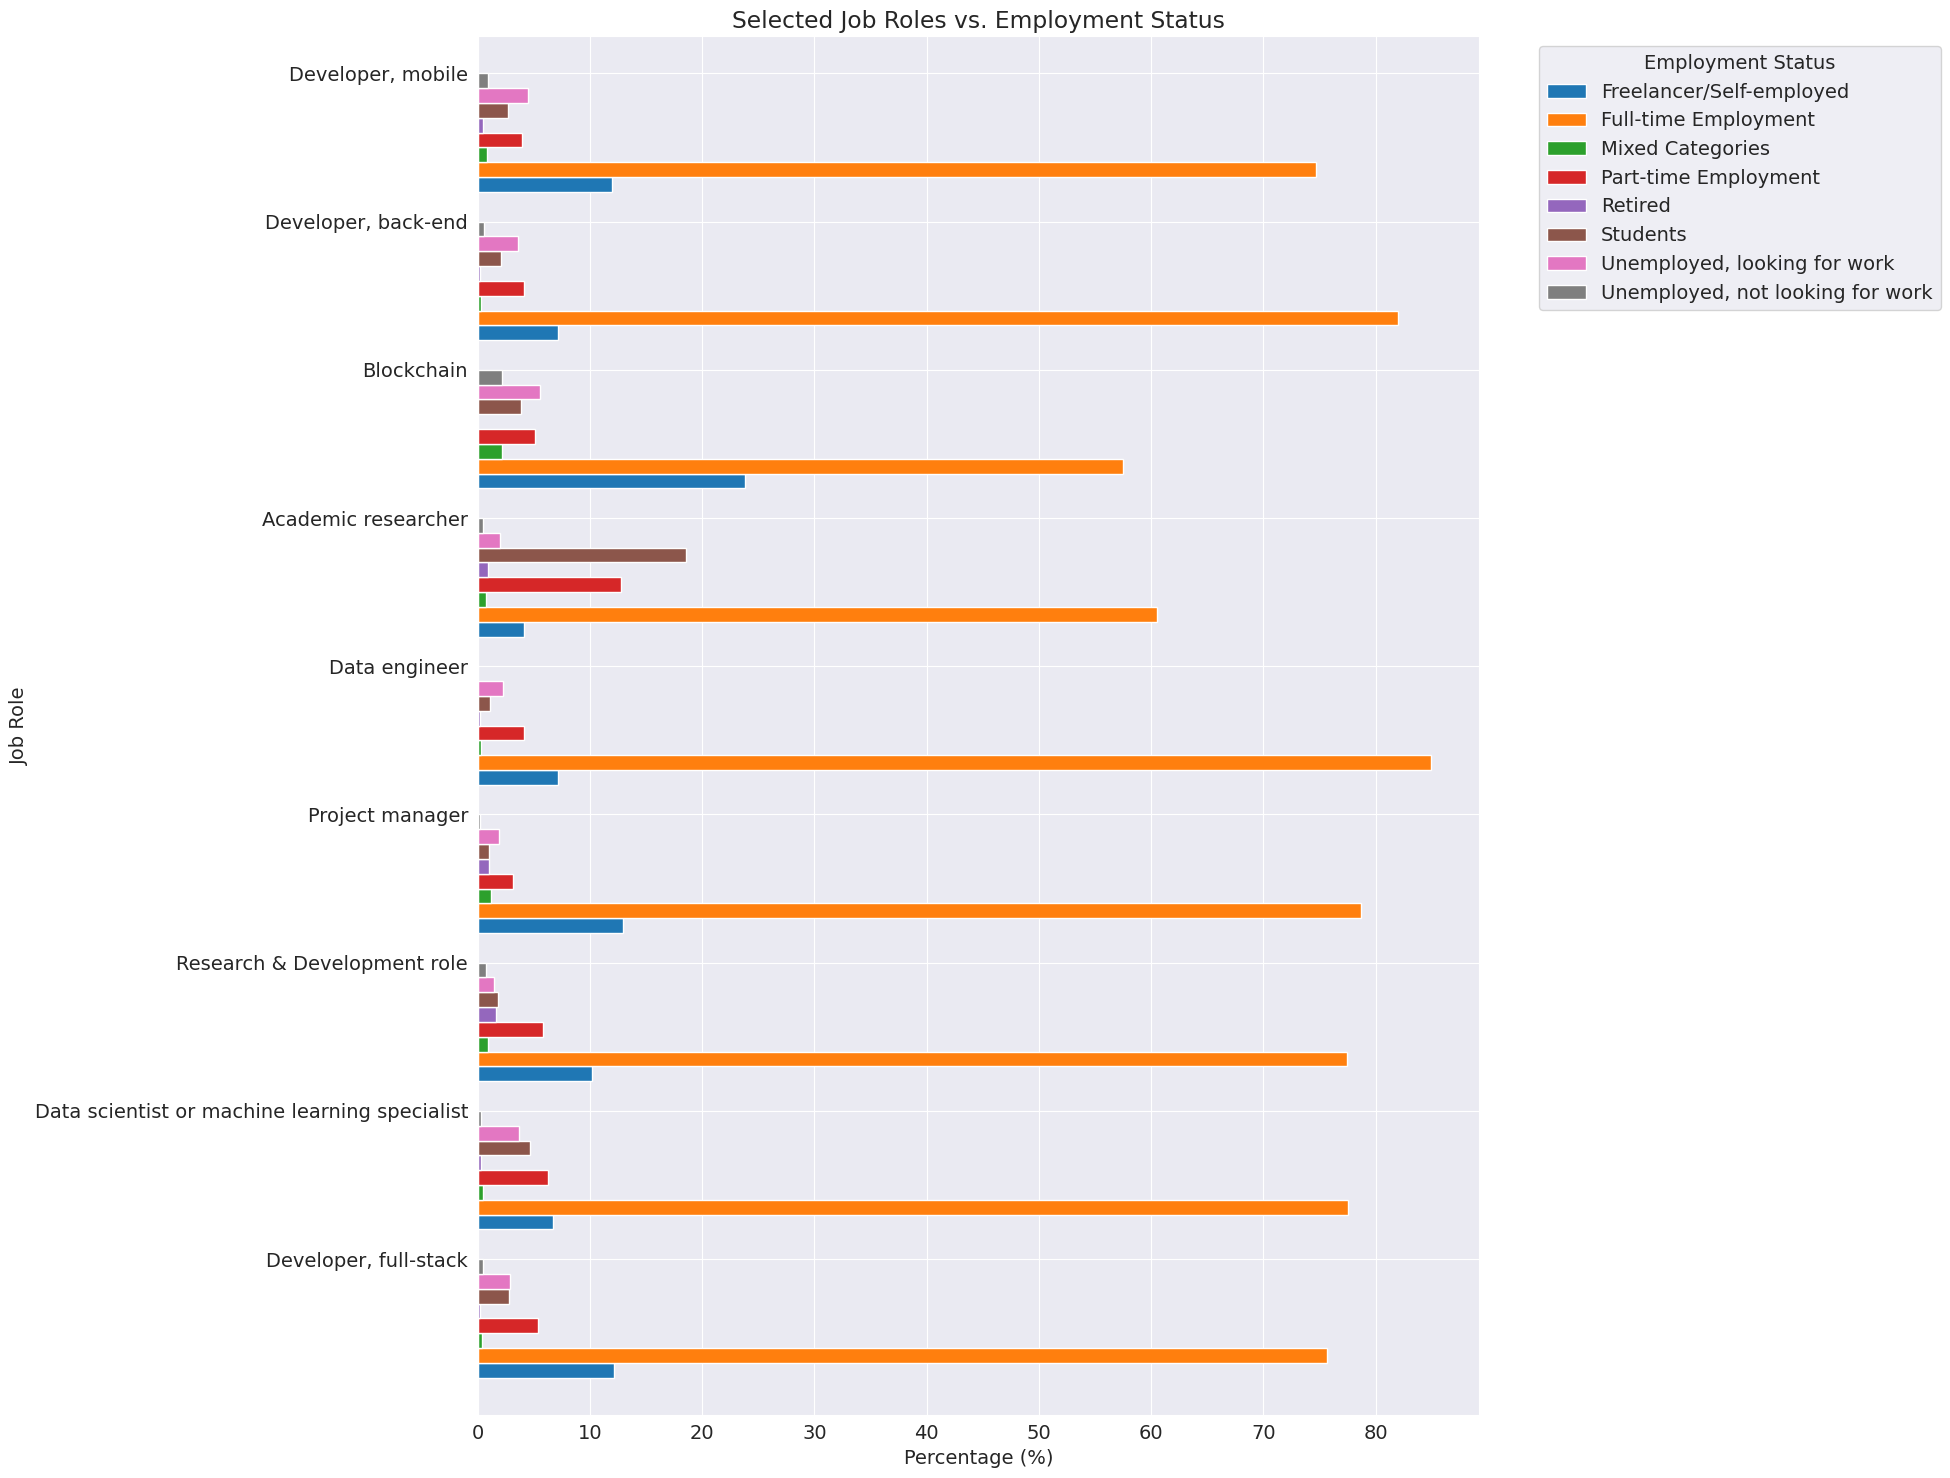

In [1]:
%run Data_loading.ipynb
%run Data_preparation_and_cleaning.ipynb
%run Visualization_and_analysis.ipynb

### Q.1: Which were the most popular programming languages in 2024( Based on the factors: extensive use over the past year and want to work in over the next year)?

To answer this question we can use `LanguageHaveWorkedWith` column.

In [2]:
schema.Language

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [3]:
survey_df.LanguageHaveWorkedWith

0                                                      NaN
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
                               ...                        
65432                                                  NaN
65433                                                  NaN
65434                                                  NaN
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 65437, dtype: object

In [4]:
lang_worked_df = survey_df['LanguageHaveWorkedWith'].dropna().str.split(';', expand=True).stack().reset_index(drop=True)
lang_worked_counts = lang_worked_df.value_counts()
lang_worked_counts

JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
PHP                        10951
PowerShell                  8328
Go                          8103
Rust                        7559
Kotlin                      5665
Lua                         3728
Dart                        3594
Assembly                    3233
Ruby                        3147
Swift                       2829
R                           2595
Visual Basic (.Net)         2499
MATLAB                      2378
VBA                         2248
Groovy                      2004
Scala                       1547
Perl                        1482
GDScript                    1402
Objective-C                 1283
Elixir                      1243
Haskell   

There are total __48 languages__ were included among the options. Let's see the percentage of respondents who selected each language.

In [5]:
total_valid_respondents = survey_df['LanguageHaveWorkedWith'].notna().sum()
lang_worked_pc = (lang_worked_counts / total_valid_respondents) * 100
lang_worked_pc = lang_worked_pc.sort_values(ascending=True)
lang_worked_pc

Zephyr                      0.307976
Nim                         0.351494
Crystal                     0.423466
Cobol                       0.691271
OCaml                       0.766591
Prolog                      0.813457
Apex                        0.840238
F#                          0.856975
Erlang                      0.873713
Ada                         0.907189
Solidity                    1.077914
Fortran                     1.113064
Zig                         1.116411
Julia                       1.144866
Clojure                     1.233576
Lisp                        1.487991
MicroPython                 1.576701
Delphi                      1.795966
Haskell                     1.996820
Elixir                      2.080509
Objective-C                 2.147460
GDScript                    2.346640
Perl                        2.480542
Scala                       2.589338
Groovy                      3.354256
VBA                         3.762658
MATLAB                      3.980249
V

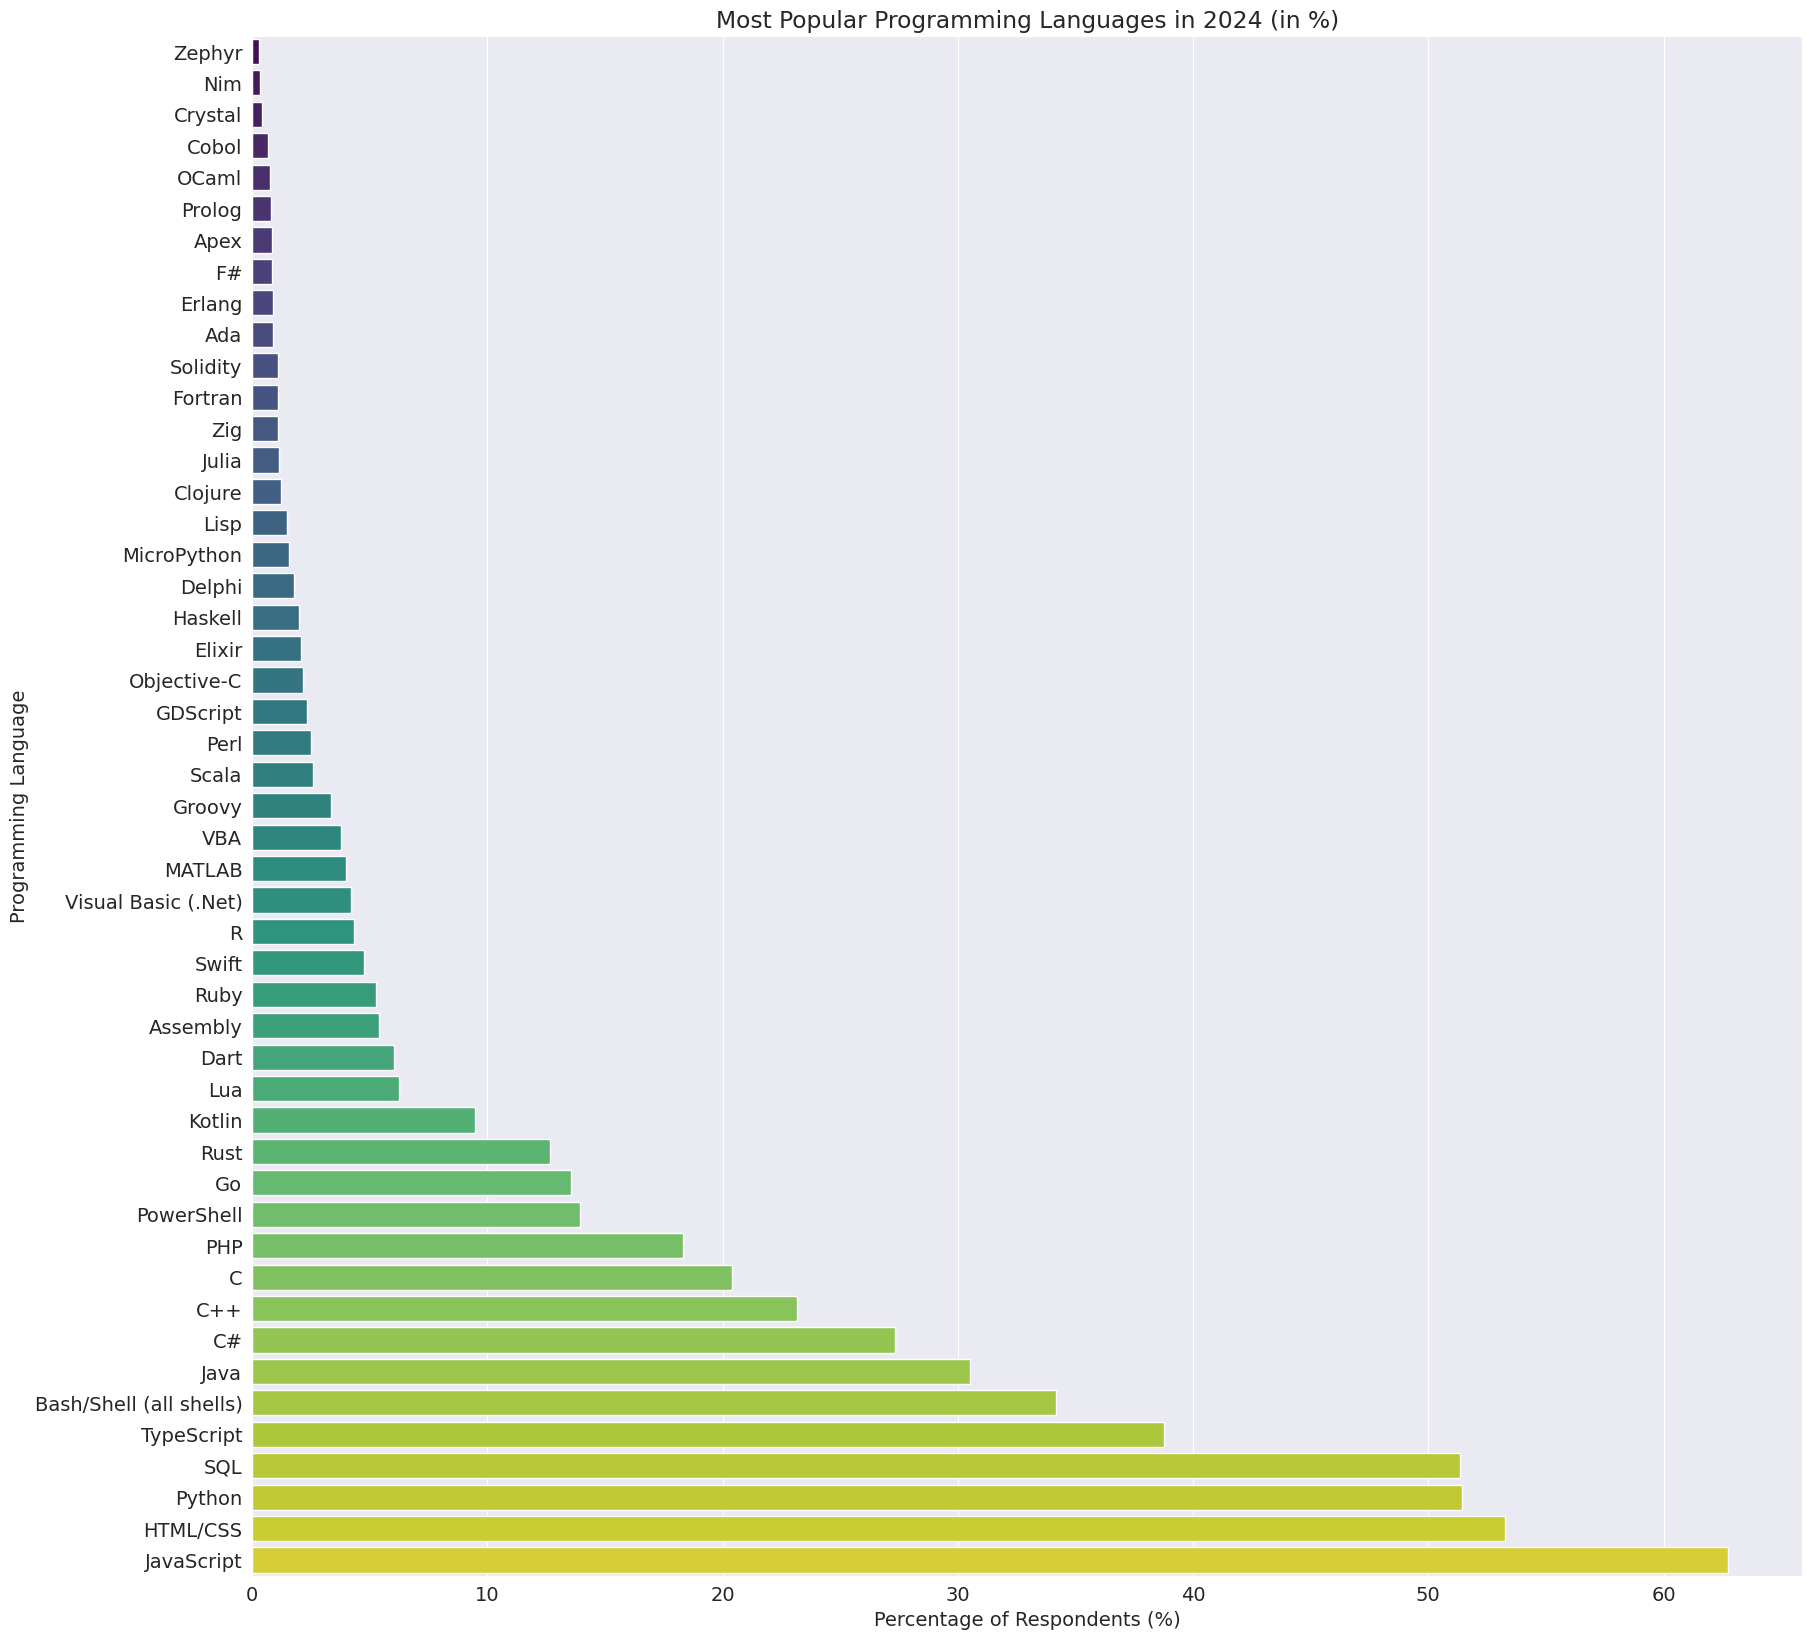

In [6]:
plt.figure(figsize=(20, 20))
sns.barplot(x=lang_worked_pc, y=lang_worked_pc.index, hue=lang_worked_pc.index, palette='viridis')
plt.title('Most Popular Programming Languages in 2024 (in %)')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Programming Language')
plt.show()

It looks like __JavaScript(62%)__ is the most poplular programming language of 2024 followed __HTML/CSS(53%)__, __Python(51%)__, and __SQL(50%)__.

### Q.2: Which were the most popular Web frameworks in 2024( Based on the factors: extensive use over the past year and want to work in over the next year)?

To answer this question we can use `WebframeHaveWorkedWith` column.

In [7]:
schema.Webframe

'Which <b>web frameworks and web technologies</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)'

In [8]:
survey_df.WebframeHaveWorkedWith

0                                                NaN
1                      Express;Next.js;Node.js;React
2                                       ASP.NET CORE
3             jQuery;Next.js;Node.js;React;WordPress
4                                                NaN
                            ...                     
65432                                            NaN
65433                                            NaN
65434                                            NaN
65435                          Angular;Node.js;React
65436    Django;Express;jQuery;Next.js;Node.js;React
Name: WebframeHaveWorkedWith, Length: 65437, dtype: object

In [33]:
framework_worked_df = survey_df['WebframeHaveWorkedWith'].dropna().str.split(';', expand=True).stack().reset_index(drop=True)
framework_worked_counts = framework_worked_df.value_counts()
framework_worked_counts

Node.js           19772
React             19167
jQuery            10381
Next.js            8681
Express            8614
Angular            8306
ASP.NET CORE       8187
Vue.js             7483
ASP.NET            6265
Flask              6245
Spring Boot        6165
Django             5835
WordPress          5711
FastAPI            4800
Laravel            3834
AngularJS          3292
Svelte             3146
NestJS             2832
Blazor             2378
Ruby on Rails      2294
Nuxt.js            1753
Htmx               1591
Symfony            1531
Astro              1462
Fastify            1070
Deno                943
Phoenix             930
Drupal              920
Strapi              815
CodeIgniter         812
Gatsby              758
Remix               757
Solid.js            590
Yii 2               454
Play Framework      387
Elm                 309
Name: count, dtype: int64

There are total __36 Frameworks__ were included among the options. Let's see the percentage of respondents who selected each framework.

In [10]:
total_valid_respondents_framework = survey_df['WebframeHaveWorkedWith'].notna().sum()
framework_worked_pc = (framework_worked_counts / total_valid_respondents_framework) * 100
framework_worked_pc = framework_worked_pc.sort_values(ascending=True)
framework_worked_pc

Elm                0.684219
Play Framework     0.856934
Yii 2              1.005292
Solid.js           1.306437
Remix              1.676225
Gatsby             1.678439
CodeIgniter        1.798012
Strapi             1.804654
Drupal             2.037156
Phoenix            2.059299
Deno               2.088085
Fastify            2.369301
Astro              3.237307
Symfony            3.390093
Htmx               3.522951
Nuxt.js            3.881668
Ruby on Rails      5.079604
Blazor             5.265605
NestJS             6.270897
Svelte             6.966188
AngularJS          7.289475
Laravel            8.489626
FastAPI           10.628640
WordPress         12.645867
Django            12.920440
Spring Boot       13.651159
Flask             13.828303
ASP.NET           13.872589
Vue.js            16.569607
ASP.NET CORE      18.128474
Angular           18.391975
Express           19.073980
Next.js           19.222338
jQuery            22.986648
React             42.441487
Node.js           43

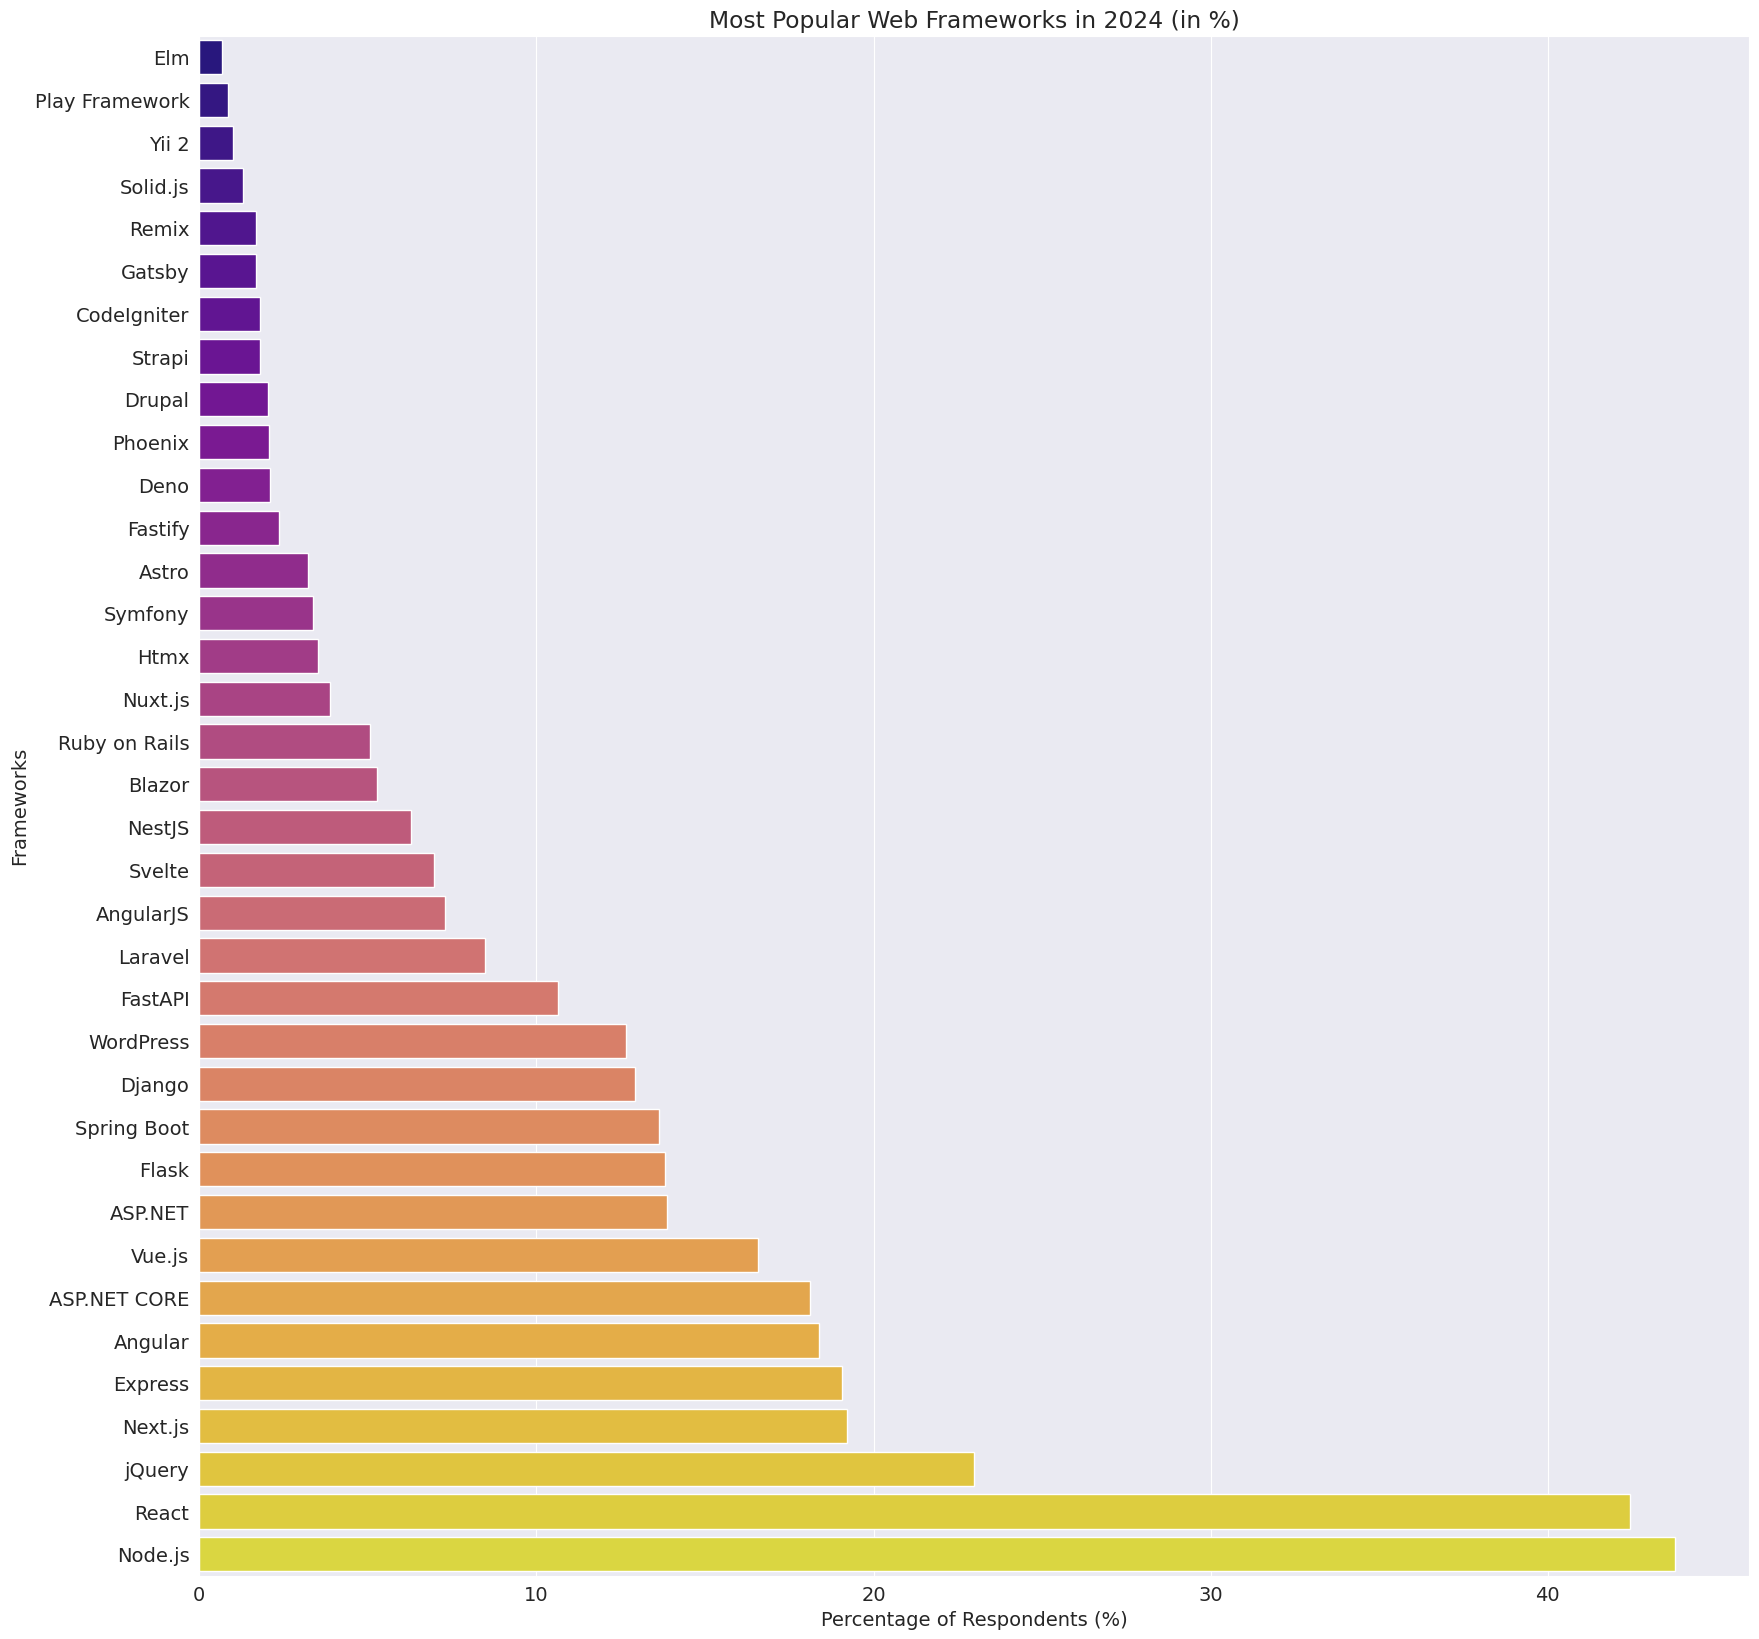

In [11]:
plt.figure(figsize=(20, 20))
sns.barplot(x=framework_worked_pc, y=framework_worked_pc.index, hue=framework_worked_pc.index, palette='plasma')
plt.title('Most Popular Web Frameworks in 2024 (in %)')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Frameworks')
plt.show()

It looks like __Node.js__ is the most poplular Web Framwork of 2024 followed __React__, __jQuery__, and __Next.js__.

### Q.3: What is the most popular development workflow where respondents are using AI Tools?

In [31]:
schema.AITool

'Which parts of your development workflow are you currently using AI tools for and which are you interested in using AI tools for over the next year?  Please select all that apply.'

In [32]:
survey_df['AIToolCurrently Using'].unique()

array([nan,
       'Learning about a codebase;Project planning;Writing code;Documenting code;Debugging and getting help;Deployment and monitoring;Search for answers;Generating content or synthetic data',
       'Writing code;Debugging and getting help', ...,
       'Learning about a codebase;Project planning;Writing code;Debugging and getting help;Testing code;Committing and reviewing code;Deployment and monitoring;Predictive analytics;Search for answers;Generating content or synthetic data;Other (please specify):',
       'Learning about a codebase;Project planning;Writing code;Testing code;Committing and reviewing code;Search for answers;Generating content or synthetic data;Other (please specify):',
       'Learning about a codebase;Writing code;Committing and reviewing code;Deployment and monitoring;Predictive analytics;Search for answers'],
      dtype=object)

In [34]:
ai_tools_df = survey_df['AIToolCurrently Using'].dropna().str.split(';', expand=True).stack().reset_index(drop=True)
ai_tools_df_counts = ai_tools_df.value_counts()
ai_tools_df_counts

Writing code                            29486
Search for answers                      24295
Debugging and getting help              20404
Documenting code                        14439
Generating content or synthetic data    12538
Learning about a codebase               11105
Testing code                             9787
Committing and reviewing code            4756
Project planning                         4381
Predictive analytics                     1888
Deployment and monitoring                1603
Other (please specify):                   449
Name: count, dtype: int64

In [39]:
total_valid_respondent = survey_df['AIToolCurrently Using'].notna().sum()
ai_tools_df_pc = (ai_tools_df_counts / total_valid_respondent) * 100
ai_tools_df_pc = ai_tools_df_pc.sort_values(ascending=False)
ai_tools_df_pc

Writing code                            84.072765
Search for answers                      69.271784
Debugging and getting help              58.177464
Documenting code                        41.169594
Generating content or synthetic data    35.749316
Learning about a codebase               31.663435
Testing code                            27.905452
Committing and reviewing code           13.560675
Project planning                        12.491446
Predictive analytics                     5.383212
Deployment and monitoring                4.570598
Other (please specify):                  1.280224
Name: count, dtype: float64

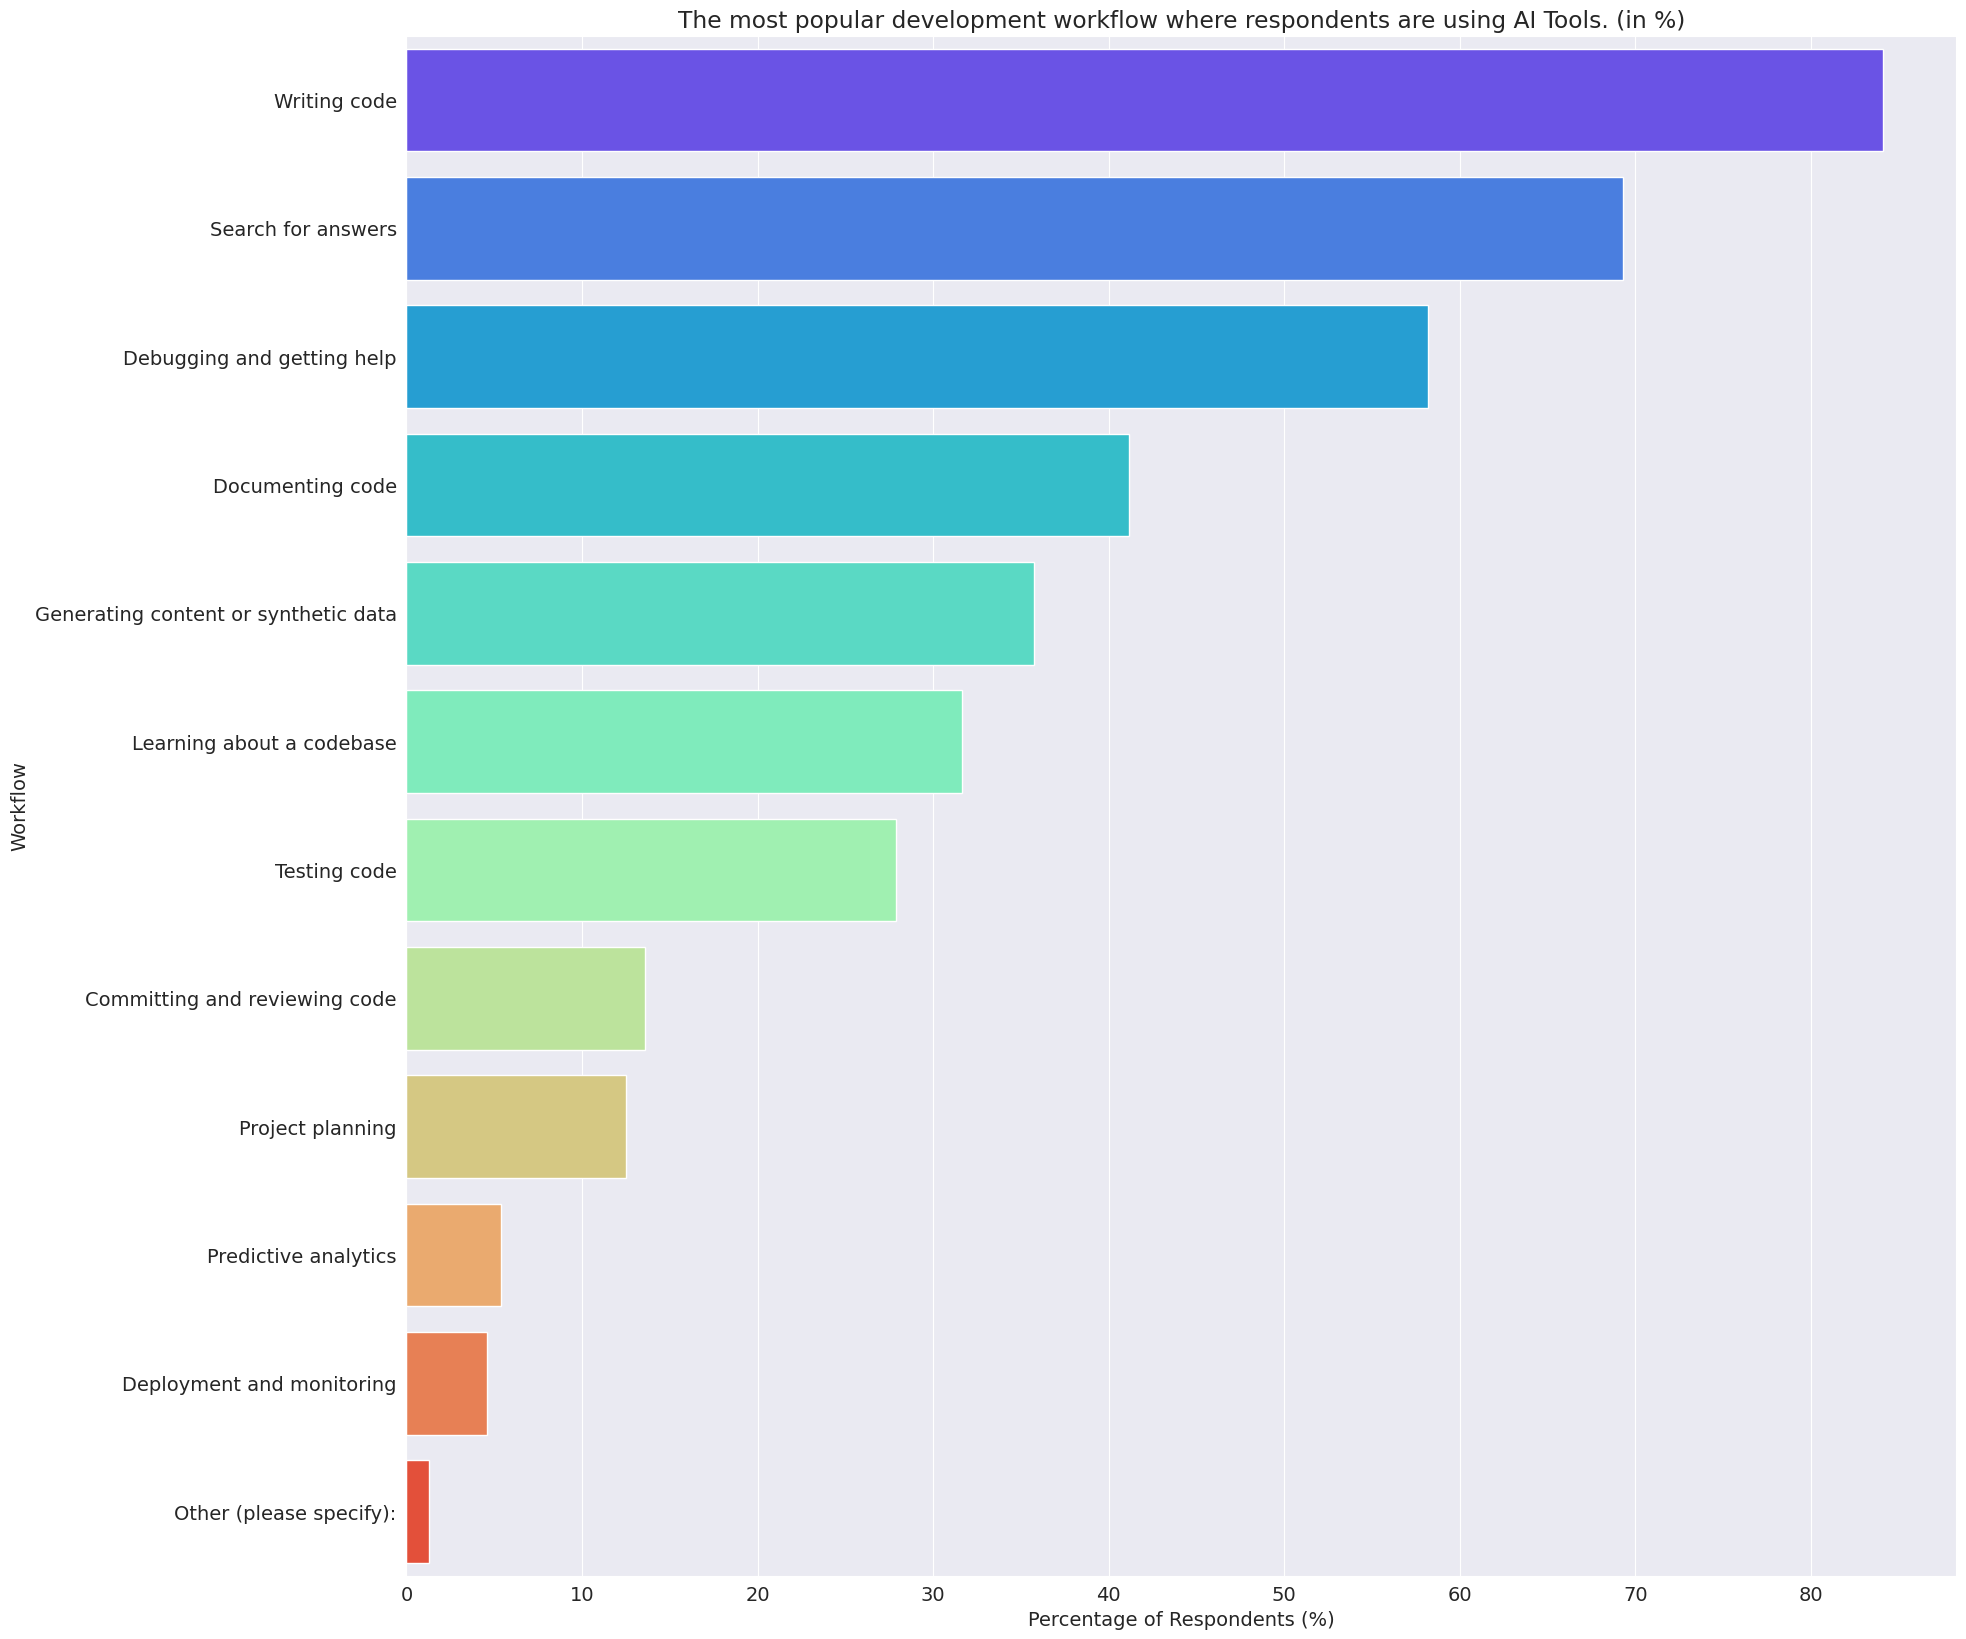

In [42]:
plt.figure(figsize=(20, 20))
sns.barplot(x=ai_tools_df_pc, y=ai_tools_df_pc.index, hue=ai_tools_df_pc.index, palette='rainbow')
plt.title('The most popular development workflow where respondents are using AI Tools. (in %)')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Workflow')
plt.show()

It appears that, AI tools are most used in __writing code, searching for answers, and debugging__. This is consistent with the increasing reliance on AI for enhancing developer productivity through code generation, intelligent search, and error resolution. Lower percentages for activities like __Deployment and monitoring__ suggest that AI's integration into these areas is still evolving. Overall, the data aligns well with the growing adoption of AI tools in core coding workflows.

### Q.4: Top industry that has most number of developers/programmers?

In [60]:
schema.Industry

'What industry is the company you work for in?'

In [67]:
industry_df = survey_df['Industry'].dropna().reset_index(drop=True)
industry_df_counts = industry_df.value_counts()
industry_df_counts

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64

In [72]:
total_valid_respondent = survey_df['Industry'].notna().sum()
industry_pc = (industry_df_counts / total_valid_respondent) * 100
industry_pc = industry_pc.sort_values(ascending=False)
industry_pc

Industry
Software Development                          41.298773
Other:                                        10.662555
Fintech                                        5.686465
Internet, Telecomm or Information Services     5.644882
Banking/Financial Services                     4.750849
Healthcare                                     4.425116
Manufacturing                                  4.383533
Retail and Consumer Services                   4.380068
Government                                     3.333564
Media & Advertising Services                   3.097928
Higher Education                               3.084067
Transportation, or Supply Chain                2.976644
Computer Systems Design and Services           2.924666
Energy                                         2.002911
Insurance                                      1.347980
Name: count, dtype: float64

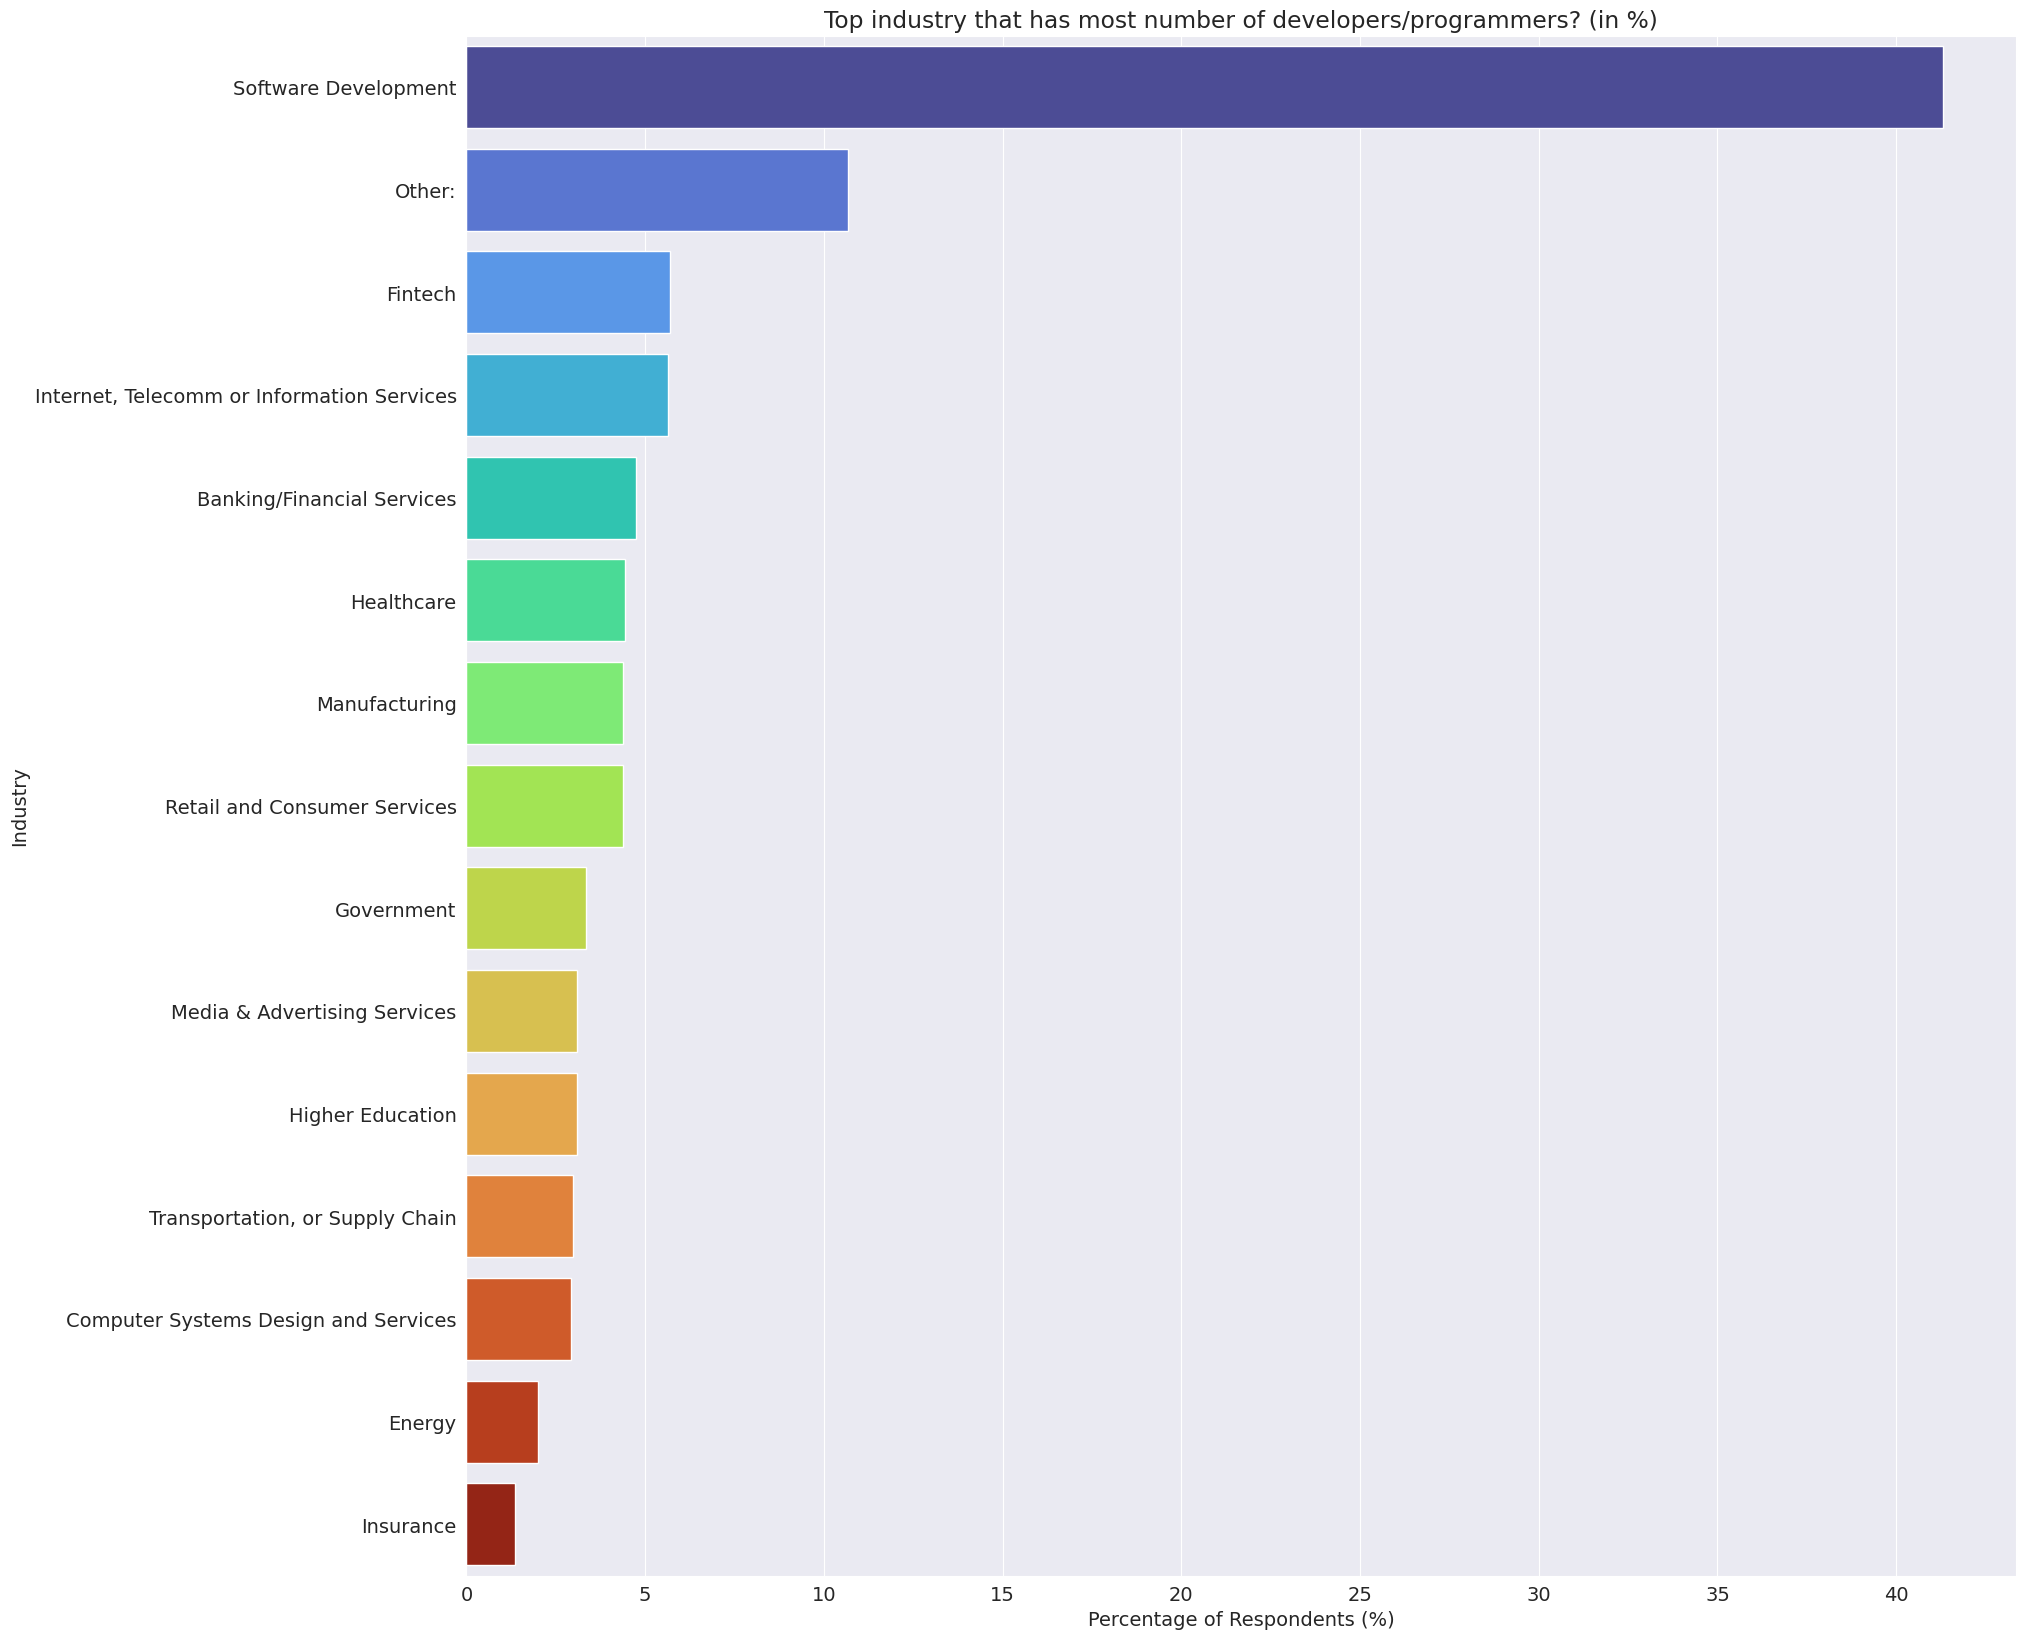

In [78]:
plt.figure(figsize=(20, 20))
sns.barplot(x=industry_pc, y=industry_pc.index, hue=industry_pc.index, palette='turbo')
plt.title('Top industry that has most number of developers/programmers? (in %)')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Industry')
plt.show()

__Software development__ remains a top industry for developers. `41%` of respondents who participated in the professional developer section of this year's survey are working in the `software development industry`.

In [79]:
schema.JobSat

'How satisfied are you in your current professional developer role?'

In [92]:
survey_df.JobSat.dropna()

10        8.0
12        8.0
15        5.0
18       10.0
20        6.0
         ... 
65178     8.0
65241     5.0
65265     8.0
65351     8.0
65412     8.0
Name: JobSat, Length: 29126, dtype: float64

In [88]:
job_sat_counts = survey_df.JobSat.dropna().value_counts()
job_sat_counts

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

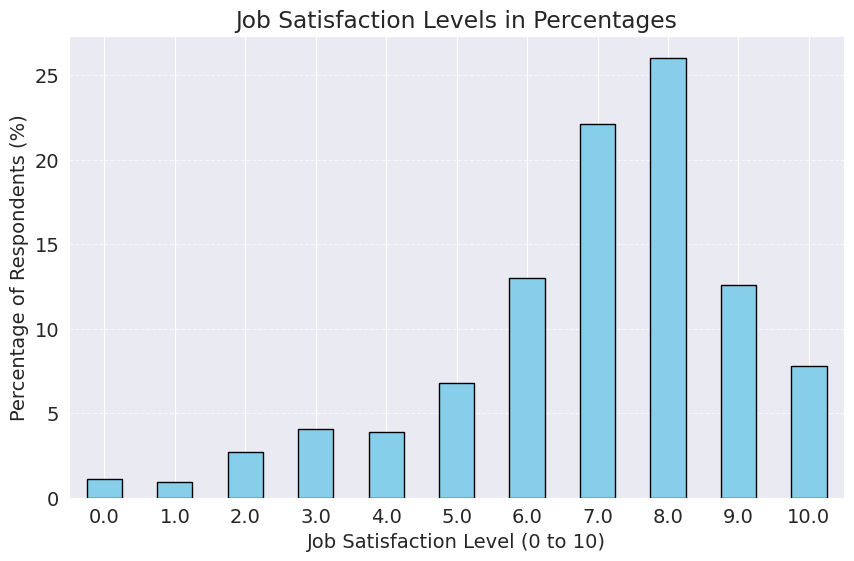

In [87]:
total_respondents = survey_df.Industry.notna().sum()
job_sat_percentages = (job_sat_counts / total_respondents) * 100

plt.figure(figsize=(10, 6))
job_sat_percentages.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Professional developer role satisfaction levels in Percentages (%)')
plt.xlabel('Job Satisfaction Level (0 to 10)')
plt.ylabel('Percentage of Respondents (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The graph shows the distribution of job satisfaction levels among respondents, ranging from 0 to 10. It highlights that most developers are moderately to highly satisfied, with levels 7.0 and 8.0 being the most frequent. A small percentage falls in the extremely low satisfaction range (0.0 to 4.0). The visualization clearly indicates a positive skew, with the majority of developers being satisfied or very satisfied in their roles, while only a small portion reports low satisfaction.

### I have answered five questions that are very important in programming community, but there are many other question that can be answered with these interactive visualizations and operations.